Analysis of 100 simulations results on a network of four boroughs without (case 1) and with a variation of the commuting matrix (case 2) during the simulations.
Here I present the results concerning the number of recovered in each borough at the end of the simulations, in order to visualize the differences in the pandemic spreading and incidence due to the possible reduction in commuting between the different districts.
Simulations have been performed with $R_0 = 3$.

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.lines as mlines
import numpy as np
import statsmodels.api as ssm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [2]:
df_novarcomm = pd.read_excel("/home/claudia/Scrivania/Tesi NYC pandemic /Modello_mobility_prova4x4/Analysis_4x4_mobility_model/NoVariationsCommuting.xlsx")
df_varcomm_1w = pd.read_excel("/home/claudia/Scrivania/Tesi NYC pandemic /Modello_mobility_prova4x4/Analysis_4x4_mobility_model/VariationsComm_1w.xlsx")

df_novarcomm.rename(columns = {'Unnamed: 0' : 'Simulations', 'Queens ' : 'Queens'}, inplace = True)
df_varcomm_1w.rename(columns = {'Unnamed: 0' : 'Simulations','Queens ' : 'Queens'}, inplace = True)

df_novarcomm['Manhattan'] = df_novarcomm['Manhattan'].div(1628706)
df_varcomm_1w['Manhattan'] = df_varcomm_1w['Manhattan'].div(1628706)
df_novarcomm['Bronx'] = df_novarcomm['Bronx'].div(1418207)
df_varcomm_1w['Bronx'] = df_varcomm_1w['Bronx'].div(1418207)
df_novarcomm['Brooklyn'] = df_novarcomm['Brooklyn'].div(2559903)
df_varcomm_1w['Brooklyn'] = df_varcomm_1w['Brooklyn'].div(2559903)
df_novarcomm['Queens'] = df_novarcomm['Queens'].div(2253858)
df_varcomm_1w['Queens'] = df_varcomm_1w['Queens'].div(2253858)

In [3]:
data = [ df_novarcomm['Manhattan'],df_varcomm_1w['Manhattan'], df_novarcomm['Bronx'], df_varcomm_1w['Bronx'], df_novarcomm['Brooklyn'],  df_varcomm_1w['Brooklyn'], df_novarcomm['Queens'], df_varcomm_1w['Queens']]

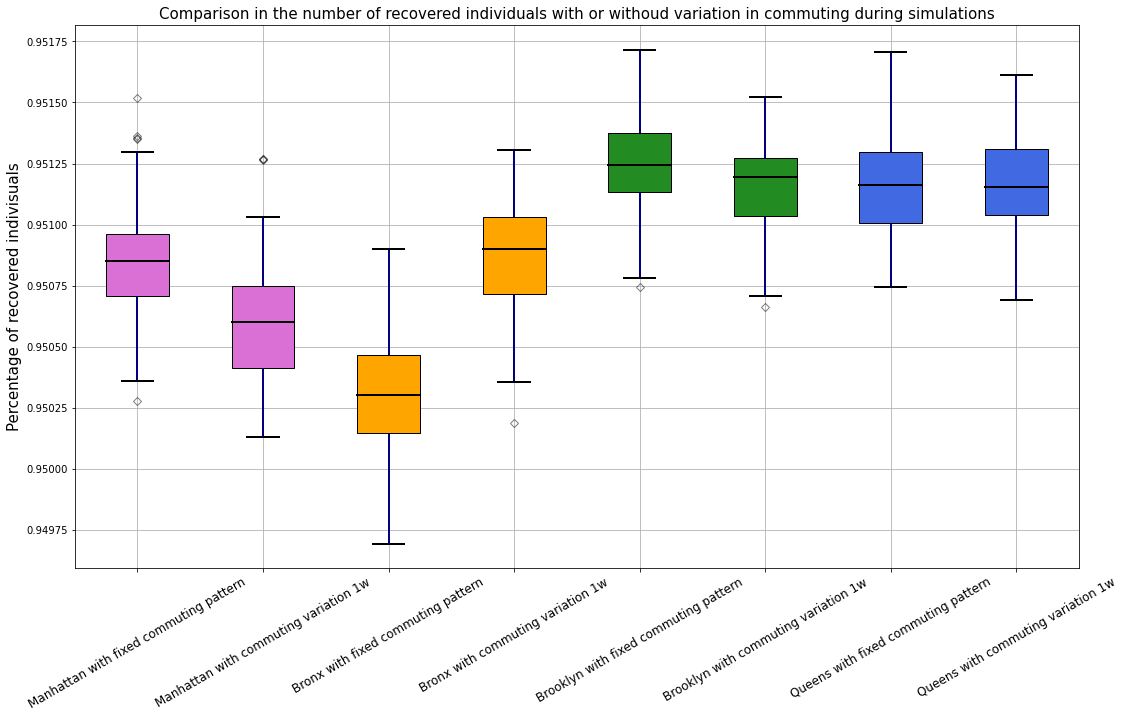

In [5]:
fig = plt.figure(1, figsize = (18, 10))
ax = fig.add_subplot(111)
bp = ax.boxplot(data, patch_artist = True, vert = 1)

colors = ['orchid', 'orchid', 'orange', 'orange','forestgreen', 'forestgreen', 'royalblue', 'royalblue'] 
  
for patch, color in zip(bp['boxes'], colors): 
    patch.set_facecolor(color);
    
for whisker in bp['whiskers']: 
    whisker.set(color ='navy', linewidth = 2) 
    
for cap in bp['caps']: 
    cap.set(color ='black', linewidth = 2)

for median in bp['medians']: 
    median.set(color ='black',linewidth = 2) 
    
for flier in bp['fliers']: 
    flier.set(marker ='D', color ='grey', alpha = 0.5) 
      
ax.set_xticklabels(['Manhattan with fixed commuting pattern', 'Manhattan with commuting variation 1w', 'Bronx with fixed commuting pattern', 'Bronx with commuting variation 1w', 'Brooklyn with fixed commuting pattern','Brooklyn with commuting variation 1w', 'Queens with fixed commuting pattern', 'Queens with commuting variation 1w'], rotation = 30, fontsize = 12) 
ax.set_ylabel('Percentage of recovered indivisuals', fontsize = 15)
plt.title("Comparison in the number of recovered individuals with or withoud variation in commuting during simulations", fontsize = 15) 
plt.grid()

From this analysis, is evident that the change in the commuting pattern among the differents boroughs leads to a decrease in the number of individuals recovered from Sars-CoV2 infection (with $R_0 = 3$ index) in the boroughs of Manhattan and Brooklyn, while for the Bronx and Queens, it is clear that despite this variation, the number of recovered individuals remains unchanged or increases with respect to the case in which the commuting pattern its fixed. This is probably related to the effective possibility for people to reduce mobility to neighborhoods other than their residence or domicile (for example for work or welfare reasons): this can be inferred from the differences in the variation in the traffic of people entering and exiting the residential area, which can be viewed from the graphs on the commuting data used for the simulations.

(Commuting patters are inferred by SafeGraph datasets, ref: article https://www.nature.com/article/s41597-020-00734-5);



Let's now try to update the commuting network at each week for 42 days, performing the simulations with $R_0 = 2.5$.

In [16]:
df2_novarcomm = pd.read_csv("/home/claudia/Scrivania/Tesi NYC pandemic /Modello_mobility_prova4x4/Analysis_4x4_mobility_model/novarcomm_2.5.csv")
df_varcomm_6w = pd.read_csv("/home/claudia/Scrivania/Tesi NYC pandemic /Modello_mobility_prova4x4/Analysis_4x4_mobility_model/variations_comm_7w.csv")
#with r0 = 2.5
df_varcomm_6w
df2_novarcomm

df_novarcomm.rename(columns = {'Queens ' : 'Queens'}, inplace = True)
df_varcomm_1w.rename(columns = {'Queens ' : 'Queens'}, inplace = True)

df2_novarcomm['Manhattan'] = df2_novarcomm['Manhattan'].div(1628706)
df_varcomm_6w['Manhattan'] = df_varcomm_6w['Manhattan'].div(1628706)
df2_novarcomm['Bronx'] = df2_novarcomm['Bronx'].div(1418207)
df_varcomm_6w['Bronx'] = df_varcomm_6w['Bronx'].div(1418207)
df2_novarcomm['Brooklyn'] = df2_novarcomm['Brooklyn'].div(2559903)
df_varcomm_6w['Brooklyn'] = df_varcomm_6w['Brooklyn'].div(2559903)
df2_novarcomm['Queens'] = df2_novarcomm['Queens'].div(2253858)
df_varcomm_6w['Queens'] = df_varcomm_6w['Queens'].div(2253858)

In [21]:
data2 = [ df2_novarcomm['Manhattan'],df_varcomm_6w['Manhattan'], df2_novarcomm['Bronx'], df_varcomm_6w['Bronx'], df2_novarcomm['Brooklyn'],  df_varcomm_6w['Brooklyn'], df2_novarcomm['Queens'], df_varcomm_6w['Queens']]

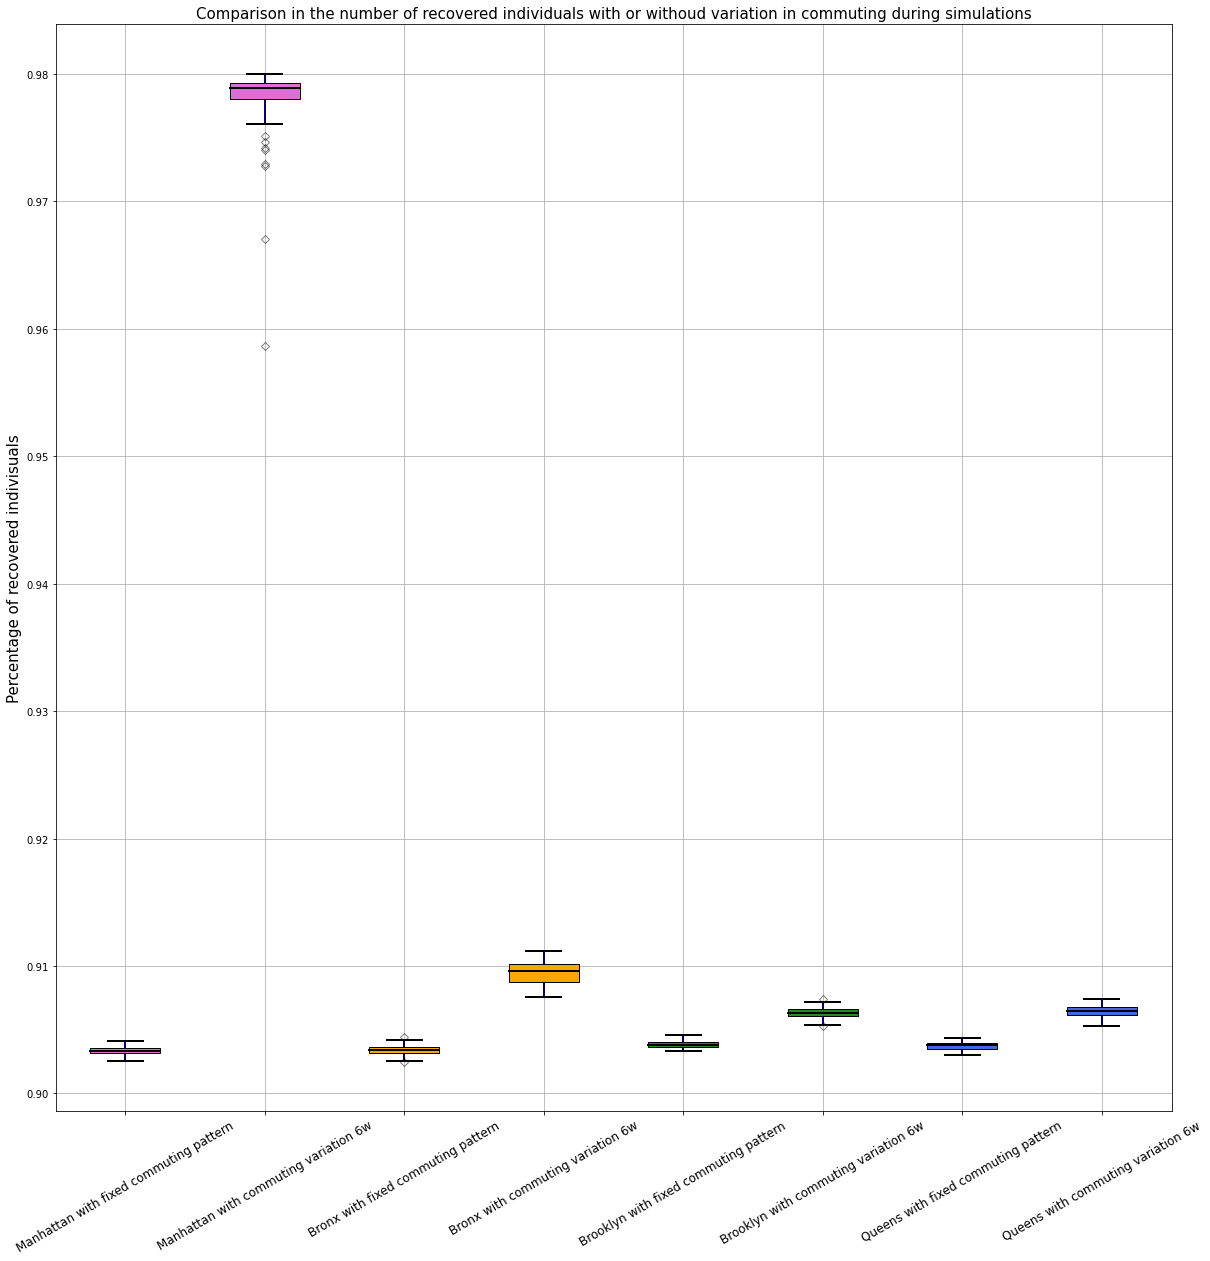

In [25]:
fig2 = plt.figure(1, figsize = (20, 20))
ax2 = fig2.add_subplot(111)
bp2 = ax2.boxplot(data2, patch_artist = True, vert = 1)

colors = ['orchid', 'orchid', 'orange', 'orange','forestgreen', 'forestgreen', 'royalblue', 'royalblue'] 
  
for patch, color in zip(bp2['boxes'], colors): 
    patch.set_facecolor(color);
    
for whisker in bp2['whiskers']: 
    whisker.set(color ='navy', linewidth = 2) 
    
for cap in bp2['caps']: 
    cap.set(color ='black', linewidth = 2)

for median in bp2['medians']: 
    median.set(color ='black',linewidth = 2) 
    
for flier in bp2['fliers']: 
    flier.set(marker ='D', color ='grey', alpha = 0.5) 
      
ax2.set_xticklabels(['Manhattan with fixed commuting pattern', 'Manhattan with commuting variation 6w', 'Bronx with fixed commuting pattern', 'Bronx with commuting variation 6w', 'Brooklyn with fixed commuting pattern','Brooklyn with commuting variation 6w', 'Queens with fixed commuting pattern', 'Queens with commuting variation 6w'], rotation = 30, fontsize = 12) 
ax2.set_ylabel('Percentage of recovered indivisuals', fontsize = 15)
plt.title("Comparison in the number of recovered individuals with or withoud variation in commuting during simulations", fontsize = 15) 
plt.grid()